# Prominent Edge - ticket status

Make sure to install seaborn and pandas modules

```sh
pip install seaborn pandas
```

In [112]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

from matplotlib import pyplot as plt

sns.set()
%matplotlib inline

### Reading generated csv files.

In [73]:
df = pd.read_csv('tickets.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df.head()

,Unnamed: 0,id,subject,status_name,assigned_group,created_at,updated_at
0,0,1494,Contact request submitted,open,Unassigned,2018-02-08 16:33:18,2018-02-08 16:33:18
1,1,1493,User name & password,open,Unassigned,2018-02-08 16:30:12,2018-02-08 16:30:12
2,2,1492,FireCARES - Access.,open,Unassigned,2018-02-08 15:08:27,2018-02-08 15:08:27
3,3,1491,FireCARES - Access.,open,Unassigned,2018-02-08 14:56:27,2018-02-08 14:56:27
4,4,1490,Department administrator request - nealon.thom...,closed,Accounts,2018-02-08 06:08:27,2018-02-08 14:41:45


### Data processing

### Modified 'resolved' value to 'closed'

In [74]:
df.loc[df['status_name'] == 'closed', 'status_name'] = 'resolved'

### Generating heatmap

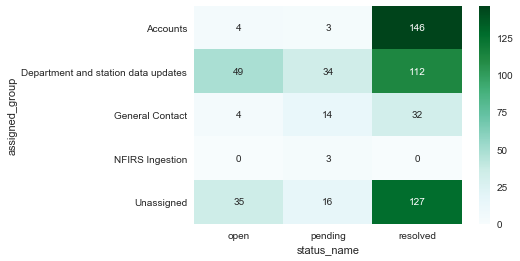

In [75]:
df_groups = df.groupby(['status_name', 'assigned_group']).size().reset_index(name='count')
df_heatmap = df_groups.pivot_table(index='assigned_group', columns='status_name', values='count', fill_value=0)
sns.heatmap(df_heatmap, annot=True, fmt="d", cmap='BuGn')

## Measuring time for open tickets

In [78]:
not_closed_df = df.loc[(df['status_name'] != 'resolved')]
date_today = datetime.today()

not_closed_df['delta_days'] = abs(not_closed_df['created_at'] - date_today).astype('timedelta64[D]').astype('int')
not_closed_df.sort_values(by='delta_days', ascending=False, inplace=True)
not_closed_df.head()

,Unnamed: 0,id,subject,status_name,assigned_group,created_at,updated_at,delta_days
546,546,112,Contact request submitted,pending,Unassigned,2017-04-25 14:46:36,2017-06-16 12:52:33,288
540,540,127,Contact request submitted,open,Department and station data updates,2017-04-27 20:06:26,2017-08-11 13:33:41,286
537,537,134,FireCARES - New feedback received.,pending,Unassigned,2017-04-28 18:54:13,2017-06-16 12:53:02,285
535,535,148,Contact request submitted,pending,Unassigned,2017-05-01 16:18:03,2017-06-16 12:52:17,282
533,533,153,Contact request submitted,pending,Unassigned,2017-05-01 17:32:37,2017-06-16 12:53:30,282


## Estimate closing time for resolved tickets

In [108]:
resolved_df = df.loc[(df['status_name'] == 'resolved')]
resolved_df['delta_hour'] = abs(resolved_df['created_at'] - resolved_df['updated_at']).astype('timedelta64[h]')

reduced_df = resolved_df[['assigned_group', 'delta_hour']]
assigned_means_df = reduced_df.groupby(['assigned_group']).mean().reset_index()
assigned_means_df.head()

,assigned_group,delta_hour
0,Accounts,37.417808
1,Department and station data updates,492.946429
2,General Contact,141.031250
3,Unassigned,170.984252


### Plotting results

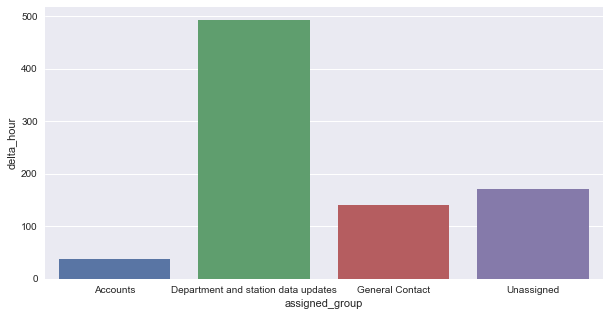

In [113]:
plt.figure(figsize=(10,5))
sns.barplot(assigned_means_df.assigned_group, assigned_means_df.delta_hour)